# P1 - Refeita

In [39]:
# Includes
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

def plot(signal, title="Signal", xl='n', yl='y[n]'):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Titles and labels
    ax.set_title(title)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    # Plot
    plt.stem(signal[1], signal[0])

def plot_cont(signal, title="Signal", xl='n', yl='y[n]'):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Titles and labels
    ax.set_title(title)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    # Plot
    plt.plot(signal[1], signal[0])
    plt.show()

$$ y[n] = x^2[n+1] \newline $$
Para que o sistema seja invariante no tempo,
$$
x_1[n] = x[n+1] \rightarrow y_1[n] = y[n+1] \\~\\
y_1[n] = (x_1[n+1])^2 = (x[n+2])^2 \\~\\
y[n+1] = (x[n+1+1])^2 = (x[n+2])^2 \\~\\
$$
Portanto, o sistema é **invariante** no tempo.

In [11]:
# Utilizando o método numérico
n = np.arange(-10, 11, 1)
# Gerando números aleatórios para a entrada
x = 100*(np.random.default_rng().random(n.size)) - 50
nx = n + 1 # x[n+1] = x[nx]
# Calculando todos os valores de y[n]
y = x**2
####### Construindo y1
x1 = x
nx1 = nx + 1    # x[nx+1] = x1[nx1]
y1 = x1**2
# Comparando y = y1 e nx+1=nx1
diff = [abs(y1 - y).mean(), abs((nx1-1 - nx)).mean()]
if (diff[0]<1e-6 and diff[1]<1e-6):
    print("y é invariante no tempo")
else:
    print("y é variante no tempo")


y é invariante no tempo


$$
x[n] = n(u[n+3] - u[n-12]) \\~\\
h[n] = n(u[n] - u[n-5])
$$

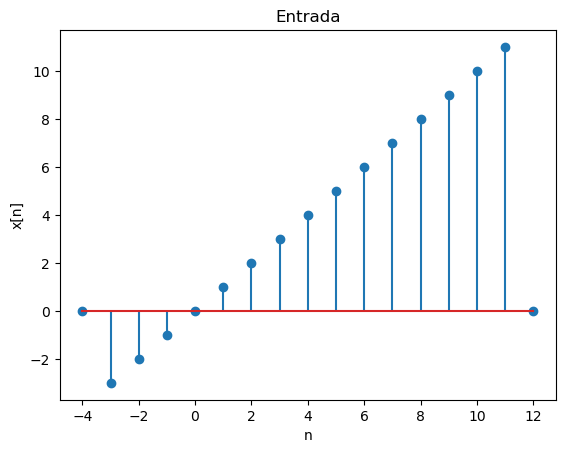

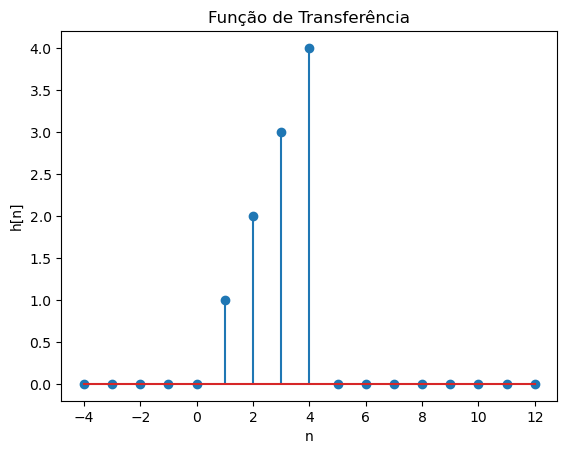

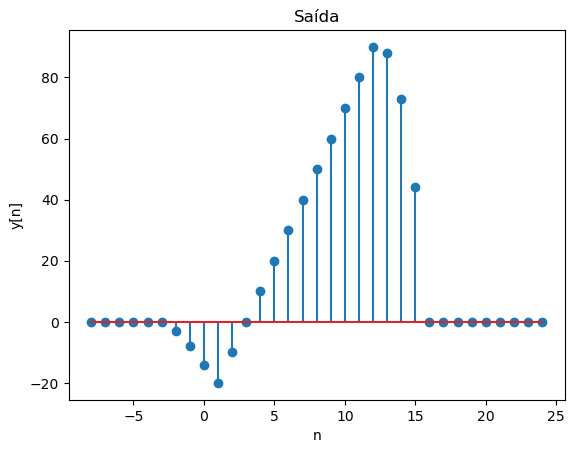

In [32]:
n = np.arange(-4, 13, 1)
x = n*(np.heaviside(n + 3, 1) - np.heaviside(n - 12, 1))
h = n*(np.heaviside(n, 1) - np.heaviside(n - 5, 1))
##
y = np.convolve(x, h)
ny = np.arange(2*n[0], 2*n[-1]+1)
##
plot([x, n], xl="n", yl="x[n]", title="Entrada")
plot([h, n], xl="n", yl="h[n]", title="Função de Transferência")
plot([y, ny], xl="n", yl="y[n]", title="Saída")

$$
y[n] - y[n-1] + 0.5y[n-2] = x[n] - 0.5x[n-1] \\~\\
a = [1, -1, 0.5] \newline
b = [1, -0.5, 0]
$$

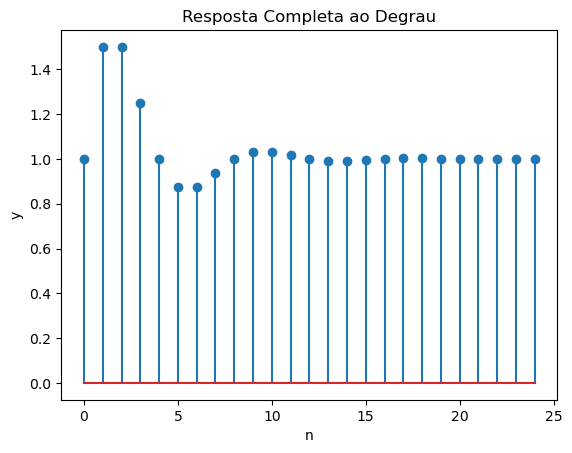

In [34]:
##
a = [1, -1, 0.5]
b = [1, -0.5, 0]
##
n = np.arange(0, 25, 1)
x = np.heaviside(n, 1)
##
y = sp.lfilter(b, a, x)
plot([y, n], xl="n", yl="y", title="Resposta Completa ao Degrau")

In [36]:
(y-1)<2e-2

array([ True, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Podemos observar que estabiliza em n=12

$$
h[n] = (0.2^n + (-0.6)^{n+1})u[n] \\~\\
h[n] = (0.2^n + (-0.6)(-0.6)^n)u[n] \\~\\
H[jω] = \dfrac{1}{1-0.2e^{-jω}} - \dfrac{0.6}{1+0.6e^{-jω}} \\~\\
H[jω] = \dfrac{1+0.6e^{-jω} - 0.6+0.12e^{-jω}}{(1-0.2e^{-jω})*(1+0.6e^{-jω})}\\~\\
H[jω] = \dfrac{0.4+0.72e^{-jω}}{1+0.4e^{-jω}-0.12e^{-2jω}}\\~\\
H[z] = \dfrac{0.4z^{-2}+0.72z^{-1}}{z^{-2}+0.4z^{-1}-0.12}\\~\\
$$

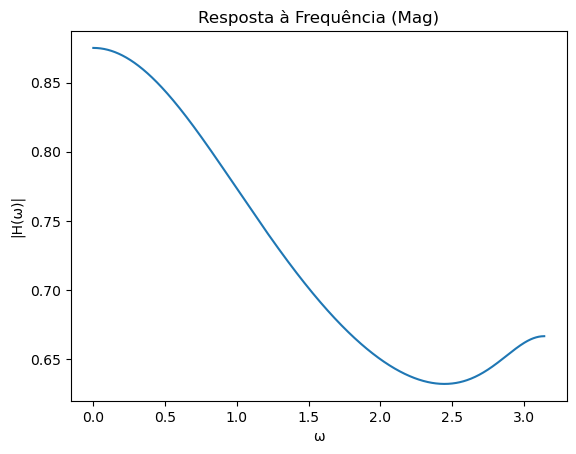

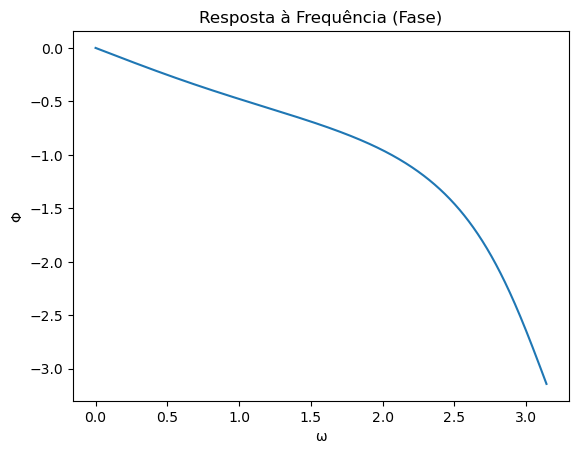

In [54]:
w = np.linspace(0, np.pi, 1000)
j = complex(0, 1)
s = -j*w
##
H = (1/(1-0.2*np.exp(s))) - (0.6/(1 + 0.6*np.exp(s)))
plot_cont([abs(H), w], xl="ω", yl="|H(ω)|", title="Resposta à Frequência (Mag)")
plot_cont([np.angle(H), w], xl="ω", yl="Φ", title="Resposta à Frequência (Fase)")

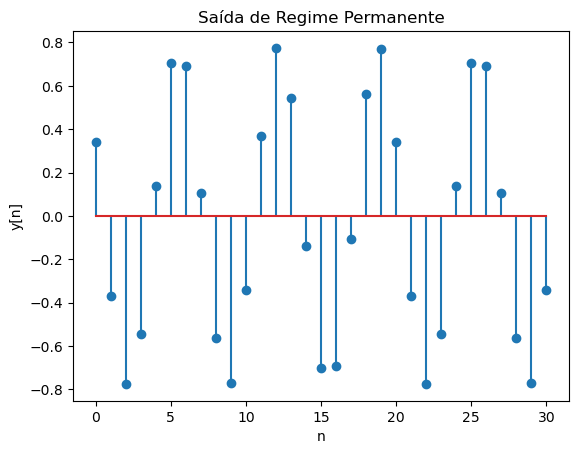

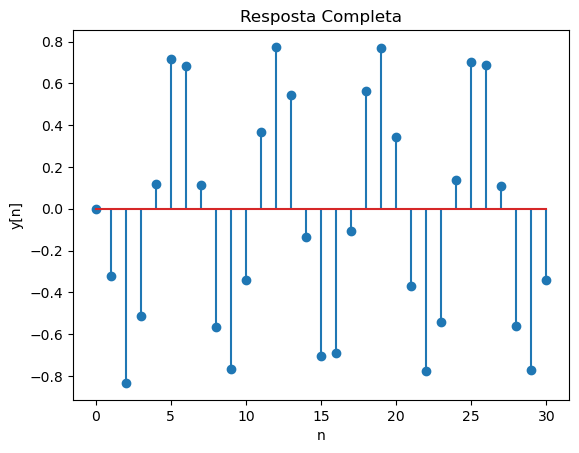

In [53]:
## Para a Frequência de x:
wx = 0.3*np.pi
sx = -j*wx
Hx = (1/(1-0.2*np.exp(sx))) - (0.6/(1 + 0.6*np.exp(sx)))
## Reconstruindo a saída:
n = np.arange(0, 31, 1)
y = np.abs(Hx)*(np.cos(wx*n + np.pi/2 + np.angle(Hx)))
plot([y, n], title="Saída de Regime Permanente")
## Reconstruíndo saída completa
x = np.cos(wx*n + np.pi/2)
a = [1, 0.4, -0.12]
b = [0.4, 0.72]
y = sp.lfilter(b, a, x)
plot([y, n], title="Resposta Completa")